<a href="https://colab.research.google.com/github/Neipoor/ML2019-assignments/blob/master/ML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Exploration on Wine Data


**32513 Machine Learning Spring 2019 Assignment 2**


**Nianji Yang 13012531**


## 1. Introduction

Wine has evolved as an important component of our diet, life and culture since the time-immemorial. It is an indispensable part for various occasions, from situations as mundane as an ordinary dinner to moments as meaningful as weddings. The wine market is huge, with 302.02 billion $USD in 2017 and expected to continue the growth at 5.8% per year [1]. An Australian over 15 years old will consume on average approximately 4 Litres of wine per year [2]. This figure is still far below the safe drinking threshold (circa. 51 Litres per year for female, 102 Litres per year for male) [3]. Globally, nearly half of the adult population are non-drinkers. Of those drinkers, more than three quarters do so only for no more than 2 days a week. For wine producers, this means that there is still a great potential of the wine market yet to be realised. 

One of the major reasons for low consumption of wine is a lack of ability to evaluate wine quality when making a purchase. Connoisseurs and experienced wine drinkers would be able to pick a preferred high-quality wine with ease. Casual or novice drinkers, on the contrary, are often puzzled by hundreds, or even thousands of wines to choose from. A great proportion of wine in liquor stores do not come with a rating (score) and the information on the packaging (e.g. region, varietal, etc) tells little about its quality to the inexperienced. Consequently, some consumers will be led by a discount catalogue or the extent of fanciness of the packaging and end up buying a wine with a poor quality. They may be disappointed by the flavours of their purchases, which will reduce the likelihood of them purchasing wine again.

In sum, the lack of ability of the most casual drinkers to pick a good-quality wine eventually results in a loss of customers and hence reduced revenues for the wine market (i.e. producers). For consumers, this ‘ignorance’ also makes the purchasing and tasting experience unpleasant. Both sides can benefit from a solution which is aimed at predicting the quality of a wine based on characteristics known to the consumers. 

Research exists that aims to predict wine quality using physicochemical characteristics, such as pH, density, residual sugar [4]. The precision of such prediction is mediocre, averaging around 70% for both white and red wines. The model could be further optimised to achieve better accuracy but it is not a consumer-oriented approach as these physicochemical features cannot usually be accessed by consumers. Information that can be found on a bottle can be directly accessed by consumers. Consumers can get a first impression of wine by reading the review on its packaging. The review consists of a sensory analysis of the tasting experience of the wine and is related subtly to other characteristics of the wine, such as its varietal or region. Bernard Chen et al. wrote a very interesting paper looking into the possibility of predicting the quality of wine using the sensory analysis presented on the bottle [5]. Also, It would be rewarding if data mining of other information found on a wine bottle (e.g. region, vineyard, varietal) can be used to generate accurate prediction of wine quality (ratings). Such technique will benefit consumers by making their purchasing process easier and also the wine producers as more consumers will learn about their wines. This is also the aim for this report - to explore the possibility of developing an approach for predicting wine quality from the information that can be retrieved from wine packaging. 


## 2. Exploration

### 2.1 Data Acquisition 

The dataset was downloaded from https://www.kaggle.com/zynicide/wine-reviews. The dataset is about wine reviews which includes details of different wine. The dataset is quite clean and interesting for NLP and classification, which were mentioned in our machine learning lectures. It is a quite awesome dataset for a beginner, like me, to practice. 

In [0]:
import pandas as pd
import pandas as pd
import numpy as np

In [0]:
# Load dataset from my personal Google Drice via PyDrive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#The shared link for my wint-dataset from my Google Drive
link = 'https://drive.google.com/open?id=1BXgoSJtlMSJei0Lo54lzHeT3QAfuCdP4'

In [0]:
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('winemag-data.csv')  
df = pd.read_csv('winemag-data.csv')

### 2.2 Dataset Overview

The dataset includes 141617 rows and 15 columns when I downloaded it. 

In [5]:
# Have a look at the content of wine dataset.
df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,vintage
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0


In [6]:
# Show the total number of rows and columns from wine dataset.
df.shape

(141617, 15)

In [0]:
# The first column "Unnamed: 0" is useless, so I decided to delete it.
df = df.drop(['Unnamed: 0'], axis = 1)

### 2.3 Missing Value Treatment and Data Cleaning

First, we run the code to have a look at the missing values in each feature. 

In [8]:
# Check the missing values
def MissingValues(df):
    total = df.isnull().sum().sort_values(ascending = False) 
    percent = (df.isnull().sum() / df.isnull().count() * 100 ).sort_values(ascending = False) 
    df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 
    print(df[~(df['Total'] == 0)])
    return
  
MissingValues(df)

                       Total    Percent
region_2               86832  61.314673
designation            40182  28.373712
taster_twitter_handle  30649  21.642176
taster_name            24917  17.594639
region_1               22886  16.160489
price                   9658   6.819803
vintage                 5234   3.695884
province                  61   0.043074
country                   61   0.043074
variety                    1   0.000706


Considering the feature "region_2" has lots of missing values and it is not a key feature in my analysis, I decided to delete this column. Also, since the feature "taster_name" and "taster_twitter_handle" will not be helpful in the further analysis and modelling, I decided to delete this column as well. Additionally, we can easily find that "title" is a mixed column which includes designation, region_1 and wine brand as well as vintage.Therefore, I decided to split it to delete this repetitive feature.

In [0]:
df = df.drop(['region_2', 'taster_name', 'taster_twitter_handle', 'title'], axis = 1)

Since the features "country" and "price" might be useful for further prediction and classification, I decided to drop rows with null value in these columns.The rows with null calues in "variety" and "vintage" were dropped as well. 

In [10]:
df = df.dropna(subset=['country'])
df = df.dropna(subset=['variety'])
df = df.dropna(subset=['price'])
df = df.dropna(subset=['vintage'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127144 entries, 1 to 141616
Data columns (total 10 columns):
country        127144 non-null object
description    127144 non-null object
designation    90146 non-null object
points         127144 non-null int64
price          127144 non-null float64
province       127144 non-null object
region_1       106594 non-null object
variety        127144 non-null object
winery         127144 non-null object
vintage        127144 non-null float64
dtypes: float64(2), int64(1), object(7)
memory usage: 10.7+ MB


Since the column "description" is assigned for each individual wine, so it should be unique.Therefore, the duplicates in feature "description" were removed.

In [11]:
df = df.drop_duplicates('description')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127115 entries, 1 to 141616
Data columns (total 10 columns):
country        127115 non-null object
description    127115 non-null object
designation    90127 non-null object
points         127115 non-null int64
price          127115 non-null float64
province       127115 non-null object
region_1       106568 non-null object
variety        127115 non-null object
winery         127115 non-null object
vintage        127115 non-null float64
dtypes: float64(2), int64(1), object(7)
memory usage: 10.7+ MB


After these brief dataset cleaning, we take a look at the dataset.We can easily find that US produces most of wines, the most expensive wine is 5k, the most popular variety is Pinot Noir and the most frequent winery is Wines & Winemakers. The more detailed exploration will be shown in next section. 

In [12]:
df.describe(include='all')

,country,description,designation,points,price,province,region_1,variety,winery,vintage
count,127115,127115,90127,127115.000000,127115.000000,127115,106568,127115,127115,127115.000000
unique,43,127115,38865,NaN,NaN,442,1260,732,16976,NaN
top,US,"Black cherry, plum and currant aromas are youn...",Reserve,NaN,NaN,California,Napa Valley,Pinot Noir,Wines & Winemakers,NaN
freq,57448,1,2057,NaN,NaN,38195,4559,14054,233,NaN
mean,NaN,NaN,NaN,88.563568,36.310483,NaN,NaN,NaN,NaN,2011.312410
std,NaN,NaN,NaN,3.075771,44.729574,NaN,NaN,NaN,NaN,3.952761
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,1904.000000
25%,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,2009.000000
50%,NaN,NaN,NaN,88.000000,26.000000,NaN,NaN,NaN,NaN,2012.000000
75%,NaN,NaN,NaN,91.000000,44.000000,NaN,NaN,NaN,NaN,2014.000000


### 2.4 Feature Selection and Data Structure

One of main goal of this project is to predict the wine quality based on different features listed in dataset. And the quality prediction is based on the points which were generated by professional sommeliers (I assumen). However, as we can see here, the range of points is from 80 to 100 and most wines have the points from 86 to 91 (25% to 75%). As a prediction, the output is kinda of messy if we directly use the points system from original dataset. Therefore, in order to simplify our data and model, I personally prefer to transfer the points into different classifications. I found the rating system from original website, https://www.winemag.com/2010/04/09/you-asked-how-is-a-wines-score-determined/, shown below.


Classic 98-100: The pinnacle of quality.

Superb 94-97: A great achievement.

Excellent 90-93: Highly recommended.

Very Good 87-89: Often good value; well recommended.

Good 83-86: Suitable for everyday consumption; often good value.

Acceptable 80-82: Can be employed in casual, less-critical circumstances.


Therefore, the points below 82 will be "Acceptable", 83 to 86 be "Good", 87 to 89 be "Very Good", 90 to 93 be "Excellent", 94 to 97 be "Superb" and above 97 be "Classic". I used numbers 1 to 6 to label them respectively. Now our target label is classified as 6 levels instead of previous 80-100 range. 

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

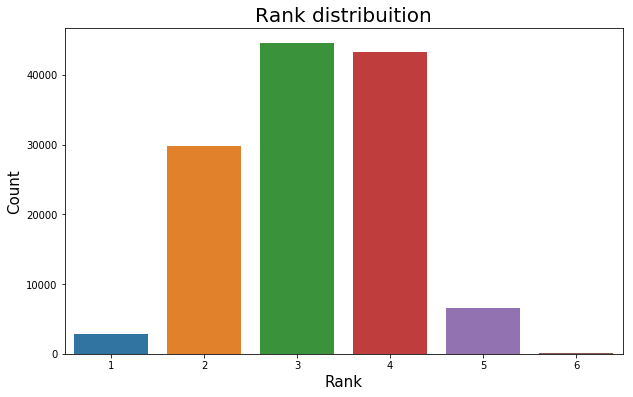

3    0.350431
4    0.340117
2    0.233977
5    0.052205
1    0.022051
6    0.001219
Name: rank, dtype: float64

In [14]:
def transform_points_rank(points):
    if points <= 82:
        return "1"
    elif points >= 83 and points <= 86:
        return "2" 
    elif points >= 87 and points <= 89:
        return "3" 
    elif points >= 90 and points <= 93:
        return "4" 
    elif points >= 94 and points <= 97:
        return "5"  
    else:
        return "6"
      
df = df.assign(rank = df['points'].apply(transform_points_rank))
plt.figure(figsize=(10,6))
plt.subplot() 
f2 = sns.countplot(x='rank', data=df) 
f2.set_title("Rank distribuition", fontsize=20) 
f2.set_xlabel("Rank", fontsize=15)
f2.set_ylabel("Count", fontsize=15)
plt.show() 
df['rank'].value_counts(normalize=True)

**2.4.1 Correlation Analysis**

Next step, we need to have a further look at the potential correalations between each input feature and target label "rank". First, we look at two numerical features from dataset, which are "price" and "vintage". As we can see in correlation table shown below, the "points" is highly correlated with "rank" since rank is generated from points. The feature "price" is somehow correlated with "rank" (~0.4), so I decided to select this feature in prediction model. However, the feature "vintage" shows a low correlation with target feature. Therefore, I decided not to apply this feature in future modelling. The same exploration was also shown in Heatmap.

In [15]:
df['rank'] = df['rank'].astype(float)
df.corr()

,points,price,vintage,rank
points,1.000000,0.396787,0.072894,0.950811
price,0.396787,1.000000,-0.086359,0.367497
vintage,0.072894,-0.086359,1.000000,0.068888
rank,0.950811,0.367497,0.068888,1.000000


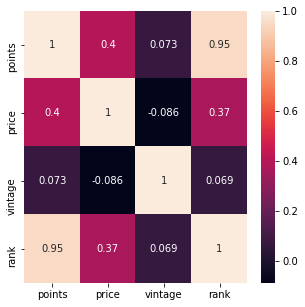

In [16]:
#Correlation of the features shown with Heatmap
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(df.corr(), ax=ax, annot=True)

In [0]:
df = df.drop(['vintage'], axis = 1)

**2.4.2 Price & Rank**

Now, we take a further look at feature price. As the descriptive table shown above, the most expensive wine is 5k. However, the average price is as low as 36 and the std is quite high. Therefore, we can narrow down our dataset by excluding outliers. The outliers can be clearly seen in following boxplot figure.   

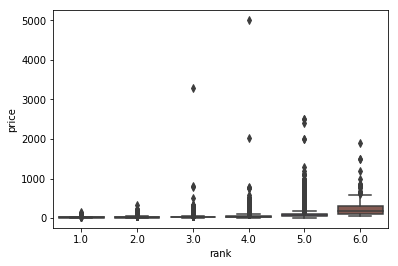

In [18]:
#price & rank
ax = sns.boxplot(x="rank", y="price", data=df)
plt.show()


In [19]:
#Have a look at outliers in feature price.
data_mean, data_std = np.mean(df['price']), np.std(df['price'])
outliers = [x for x in df['price'] if x < (data_mean - data_std * 3) or x > (data_mean + data_std * 3)]
outliers_removed = [x for x in df['price'] if x > (data_mean - data_std * 3) and x < (data_mean + data_std * 3)]
lowprice = data_mean - data_std * 3
highprice = data_mean + data_std * 3
print("Total percentage of Outliers in feature Price: ", round((len(outliers) / len(outliers_removed) )*100, 4)) 
print ("The price range after removing outliers: ", lowprice, "to ", highprice)    

Total percentage of Outliers in feature Price:  0.9322
The price range after removing outliers:  -97.87771076478981 to  170.49867603246082


Since the outliers in feature "price" are less than one percent as shwon above and the price without outliers is from 0 to 170 dollars. I decided to narrow down the price to within 200 dollars for further analysis and modelling. 

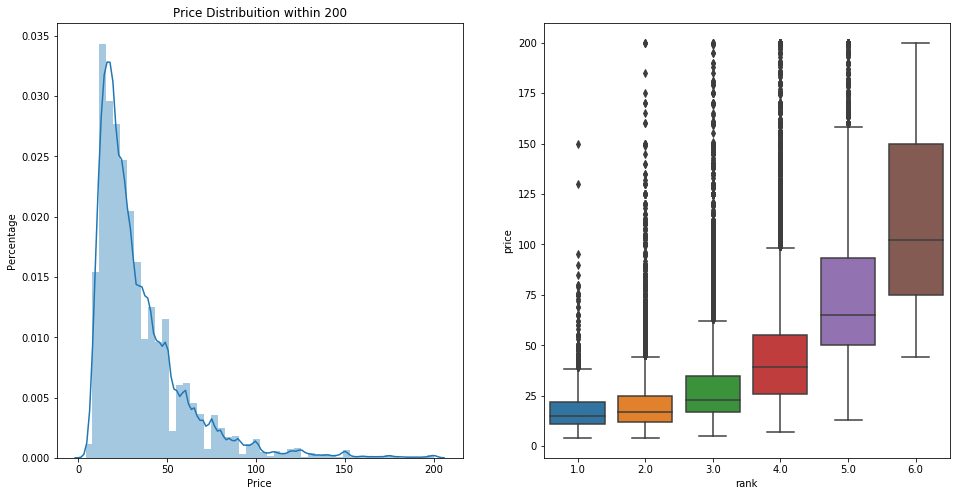

In [20]:
#Show the distribution of feature price after narrowing down to 200 dollars. 
df = df[df['price'] <= 200] 
f, ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()
#plt.figure(figsize=(16,6))
sns.distplot(df['price'], ax=ax1)
ax1.set_title("Price Distribuition within 200")
ax1.set_xlabel("Price")
ax1.set_ylabel("Percentage")
sns.boxplot(x="rank", y="price", data=df, ax=ax2)

**2.4.3 Country & Rank**

There are 19 countries with more than 100 observations, and they account for the most percentage of dataset. The rest coutries might not be appropriate for modelling considering the size of observations. Therefore, I decided to drop countries with less than 100 observations. An average rank for individual country was shown in the table below. It suggests that country might be a crucial indictor for rank classification. 

In [21]:
df.country.value_counts()[:20]


US              57296
France          18532
Italy           17405
Spain            6494
Portugal         5096
Chile            4574
Argentina        3876
Austria          2983
Australia        2433
Germany          2338
New Zealand      1492
South Africa     1311
Israel            559
Greece            438
Canada            259
Bulgaria          156
Hungary           141
Uruguay           111
Romania           104
Turkey             90
Name: country, dtype: int64

In [22]:
df = df.groupby("country").filter(lambda x: len(x) >= 100)
cr1 = df.groupby(['country'])['rank'].agg(['count','min','max','mean']).sort_values(by='mean',ascending= False)[:20]
cr1.reset_index(inplace=True)
cr1.style.background_gradient(cmap='Greens',high=0.5)


,country,count,min,max,mean
0,Austria,2983,1,6,3.69628
1,Germany,2338,1,5,3.57015
2,Canada,259,1,5,3.43629
3,Hungary,141,1,5,3.39007
4,France,18532,1,6,3.23408
5,Italy,17405,1,6,3.23235
6,US,57296,1,6,3.20953
7,Australia,2433,1,6,3.19975
8,Israel,559,1,5,3.18068
9,Portugal,5096,1,6,3.10145


**2.4.4 Designation & Rank**

The unique values in feature "designation" are around 40k, which is a lot. In addition, there are a lot of designation values with only one observation, which is not usable for training predictive model. Therefore, it can not be processed like feature "country". It will cause too many dimensions in prediction model. Therefore, I decided to abandon this column. 

In [23]:
df.designation.value_counts()

Reserve                                       2041
Estate                                        1408
Reserva                                       1278
Riserva                                        716
Estate Grown                                   660
Dry                                            407
Crianza                                        369
Estate Bottled                                 348
Vieilles Vignes                                322
Gran Reserva                                   269
Old Vine                                       245
Tradition                                      245
Rosé of                                        229
Réserve                                        160
Single Vineyard                                151
Estate Reserve                                 142
Bien Nacido Vineyard                           130
Vintage                                        126
Late Harvest                                   114
Classic                        

In [0]:
df = df.drop(['designation'], axis = 1)


**2.4.5 Province & Rank**

There are 442 unique values in feature "province", but many are with only one observations. Therefore, I decided to process this feature like what I did to feature "country", dropping the provinces with less than 100 observations. There are 125598 rows left.  


In [25]:
df.province.value_counts()

California                   38048
Washington                    8881
Oregon                        6138
Tuscany                       5454
Bordeaux                      4486
Northern Spain                4100
Piedmont                      3445
Mendoza Province              3342
Burgundy                      3245
New York                      2608
Alsace                        2242
Northeastern Italy            1996
Veneto                        1742
Loire Valley                  1716
Sicily & Sardinia             1707
Southwest France              1484
Rhône Valley                  1463
South Australia               1447
Southern Italy                1333
Douro                         1246
Provence                      1235
Central Italy                 1159
Mosel                         1112
Beaujolais                    1027
Colchagua Valley               872
Catalonia                      870
Marlborough                    857
Alentejano                     854
Virginia            

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125598 entries, 1 to 141616
Data columns (total 9 columns):
country        125598 non-null object
description    125598 non-null object
points         125598 non-null int64
price          125598 non-null float64
province       125598 non-null object
region_1       105879 non-null object
variety        125598 non-null object
winery         125598 non-null object
rank           125598 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 14.6+ MB


In [27]:
df = df.groupby("province").filter(lambda x: len(x) >= 100)
pr = df.groupby(['province'])['rank'].agg(['count','min','max','mean']).sort_values(by='mean',ascending= False)[:20]
pr.reset_index(inplace=True)
pr.style.background_gradient(cmap='Greens',high=0.5)

,province,count,min,max,mean
0,Champagne,474,2,5,4.15612
1,Wachau,358,2,5,4.12849
2,Port,296,2,6,4.02365
3,Kamptal,366,2,5,4.0082
4,Kremstal,319,2,5,3.89969
5,Rheingau,300,2,5,3.82
6,Carnuntum,106,2,5,3.76415
7,Thermenregion,108,2,5,3.73148
8,Mosel,1112,2,5,3.63219
9,Alsace,2242,1,5,3.58608


**2.4.6 Region_1 & Rank**

The feature "region_1" has the similar situation like feature "province". Therefore, I dropped the region_1 with less than 100 observations. There are 87806 rows left. 

In [28]:
df.region_1.value_counts()

Napa Valley                       4490
Columbia Valley (WA)              4200
Russian River Valley              3243
Willamette Valley                 2545
California                        2531
Paso Robles                       2457
Mendoza                           2306
Alsace                            2187
Barolo                            1698
Sonoma Coast                      1637
Rioja                             1591
Finger Lakes                      1572
Brunello di Montalcino            1320
Sonoma County                     1250
Walla Walla Valley (WA)           1131
Sta. Rita Hills                   1112
Chianti Classico                  1099
Yakima Valley                     1056
Carneros                          1054
Santa Barbara County              1050
Toscana                           1007
Dry Creek Valley                   982
Lodi                               895
Sicilia                            845
Santa Ynez Valley                  838
Santa Lucia Highlands    

In [29]:
df = df.groupby("region_1").filter(lambda x: len(x) >= 100)
rr = df.groupby(['region_1'])['rank'].agg(['count','min','max','mean']).sort_values(by='mean',ascending= False)[:20]
rr.reset_index(inplace=True)
rr.style.background_gradient(cmap='Greens',high=0.5)

,region_1,count,min,max,mean
0,Champagne,474,2,5,4.15612
1,Ballard Canyon,109,3,5,4.05505
2,Diamond Mountain District,163,1,6,4.04294
3,Beaune,153,2,5,4.03268
4,Gigondas,115,1,5,3.95652
5,Madiran,108,2,5,3.9537
6,Stags Leap District,151,1,5,3.94702
7,Adelaida District,157,2,5,3.9172
8,Ribbon Ridge,148,2,6,3.91216
9,Walla Walla Valley (OR),138,2,6,3.9058


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87806 entries, 2 to 141616
Data columns (total 9 columns):
country        87806 non-null object
description    87806 non-null object
points         87806 non-null int64
price          87806 non-null float64
province       87806 non-null object
region_1       87806 non-null object
variety        87806 non-null object
winery         87806 non-null object
rank           87806 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 9.2+ MB


**2.4.7 Variety & Rank**

I dropped the variety with less than 100 observations. There are 83684 rows left.

In [31]:
df.variety.value_counts()[:20]

Pinot Noir                  11297
Chardonnay                   9028
Cabernet Sauvignon           8001
Red Blend                    6064
Bordeaux-style Red Blend     4767
Syrah                        3310
Sauvignon Blanc              2997
Zinfandel                    2613
Merlot                       2464
Nebbiolo                     2434
Rosé                         2432
Riesling                     2406
Sangiovese                   2319
Malbec                       2222
Tempranillo                  1772
Pinot Gris                   1308
White Blend                  1229
Rhône-style Red Blend        1195
Cabernet Franc               1052
Gewürztraminer                897
Name: variety, dtype: int64

In [32]:
df = df.groupby("variety").filter(lambda x: len(x) >= 100)
vr = df.groupby(['variety'])['rank'].agg(['count','min','max','mean']).sort_values(by='mean',ascending= False)[:20]
vr.reset_index(inplace=True)
vr.style.background_gradient(cmap='Greens',high=0.5)

,variety,count,min,max,mean
0,Champagne Blend,415,1,5,3.98554
1,Sangiovese Grosso,541,2,5,3.79482
2,Aglianico,145,1,5,3.75862
3,Nebbiolo,2434,1,6,3.6779
4,Nerello Mascalese,133,1,5,3.61654
5,Sparkling Blend,692,1,6,3.51156
6,"Corvina, Rondinella, Molinara",287,2,5,3.4878
7,Pinot Noir,11297,1,6,3.48331
8,Syrah,3310,1,6,3.43958
9,Tinto Fino,103,1,5,3.42718


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83684 entries, 2 to 141616
Data columns (total 9 columns):
country        83684 non-null object
description    83684 non-null object
points         83684 non-null int64
price          83684 non-null float64
province       83684 non-null object
region_1       83684 non-null object
variety        83684 non-null object
winery         83684 non-null object
rank           83684 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 8.9+ MB


**2.4.8 Winery & Rank**

Since there are too many unique values in feature "winery" like "designation", which is not good for modelling. Thus, I will not select this feature for model training. 

In [0]:
df = df.drop(['winery'], axis = 1)

At the end, I selected feature "price", "country", "province", "region_1" and "variety" for input features. And "rank" will be my target feature. 

### 2.5 Challenge

There are two main challenges in this project so far. First, we can easily tell that the classification is apparently imbalanced. The class of 1, 5 and 6 (minority class) are with significantly lower ratio, around 8% intotal, compared to the other three classes (majority class). In this senario, the predictive model developed using traditional machine learning algorithms could be biased and inaccurate which is a big challenge in this project. This is clearly a problem because many machine learning algorithms are designed to maximize overall accuracy, but they do not take into account the class distribution or balance of classes. To solve this problem, I will apply different algorithms and try to use different metrics to evaluate them. 

Second, some of input features are objects rather than numbers, I will apply "One Hot Encoding" to convert these variables into an acceptable form for machine learning algorithms in prediction. Also, another challenge I faced is that the dimentions of these features are too many, over one thousand, which might cause extra burden for processing.

## 3. Methodology

### 3.1 Algorithms Selection

Considering our target label is imbalance. and decision trees frequently perform well on imbalanced data. Therefore, I decided to use decision tree to have a test. In additon, ensembled model like randonForest will be apllied. Random Forest is essentially a collection of Decision trees. The most significant difference between the two models is the way they utilise data. A decision tree is built on an entire dataset, using all variables of interest, while a Random forest randomly selects observations and variables to build multiple decision trees and then average the results. The advantage of a simple decision tree is the ease with interpreting the mode. Its accuracy keep improving with more splits but the data can easily be overfitted. For Random forest, the accuracy keep improving as the number of trees increases, but would eventually become constant at a certain point. The advantage is that it does not tend to create a highly biased model. Random forest will reduce variance part of error, thus on an unexpected validation data set, Random forest always wins in terms of accuracy.

Also, LogisticRegression will be tested as well. Logistic regression is used when the dependent variable is a binary (dichotomous). It is used to explain the relationship between one dependent binary variable and one or more independent variables, which can be nominal, ordinal, interval or ratio. Logistic regression requires there should be no outliers in the data. The advantages of logistic regression is its efficiency, meaning it does not require too many computational resources. It is highly interpretable, easy to regularise and does not require any tuning. The disadvantage is that it cannot solve non-linear problems. It is also highly reliant on a proper presentation of data, which means it is not a useful tool unless all the important variables are identified. For logistic regression to work better, attributes that are unrelated to the output and that are very similar to each other should be removed. It can only be used to predict a categorical outcome since the outcome is discrete. 


### 3.2 Build and Train Data Models

The size of train and test data will be 7 to 3. And I keep it all the same in three different algorithms. 

In [35]:
from sklearn.model_selection import train_test_split

x = df[['country', 'price', 'province', 'region_1', 'variety']]
y = df['rank']
x = pd.get_dummies(x, columns=['country', 'province', 'region_1', 'variety'])
print(x.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, train_size=0.7)

(83684, 300) (83684,)


In [36]:
%%time
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_predictionofdt = clf.predict(X_train)

CPU times: user 1.72 s, sys: 53.1 ms, total: 1.77 s
Wall time: 1.77 s


In [37]:
%%time
from sklearn.ensemble import RandomForestClassifier
rfc_b = RandomForestClassifier(class_weight= None)
rfc_b.fit(X_train,y_train)
y_predictionofrfc = rfc_b.predict(X_train)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 3.08 s, sys: 5.58 ms, total: 3.09 s
Wall time: 3.09 s


In [38]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_predictionoflr = logreg.predict(X_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


CPU times: user 2 s, sys: 111 ms, total: 2.11 s
Wall time: 1.95 s


## 4. Evaluation

### 4.1 Metrics Selection for Evaluation

I selected a variety of different metrics for evaluation, such as accuracy_score, f1_score, confusion_matrix, recall_score, etc.

When evaluating imbalanced dataset, accuracy score maybe is not the best metric. The other metrics mentioned below may provide better insight.

A confusion matrix is a specific table layout that visualises the performance of an algorithm. It shows correct and incorrect predictions. Precision, also called Positive Predictive Value, is a measure of exactness. It is defined as the number of true positives divided by the number of total elements. A high number of false positives will result in a low precision. Recall, also known as Sensitivity,  is defined as the number of true positives divided by the number of all positives. It is a measure of the completeness of a classifier. Low recall usually indicates a relatively high number of false negatives. Last, the F1 score, is the weighted average of precision and recall.

In [0]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, classification_report

**4.1.1 Accuracy Score**

***Accuracy Score of DecisionTree***

In [40]:
print('DecisionTree train accuracy score:',accuracy_score(y_train,y_predictionofdt))
print('DecisionTree test accuracy score:', accuracy_score(y_test,clf.predict(X_test)))

DecisionTree train accuracy score: 0.6917955546450886
DecisionTree test accuracy score: 0.47367163227913645


***Accuracy Score of RandomForest***

In [41]:
print('RandomForest train accuracy score:',accuracy_score(y_train,y_predictionofrfc))
print('RandomForest test accuracy score:', accuracy_score(y_test,rfc_b.predict(X_test)))

RandomForest train accuracy score: 0.6833282119567073
RandomForest test accuracy score: 0.4773759260734486


***Accuracy Score of LogisticRegression***

In [42]:
print('LogisticRegression train accuracy score:',accuracy_score(y_train,y_predictionoflr))
print('LogisticRegression test accuracy score:', accuracy_score(y_test,logreg.predict(X_test)))

LogisticRegression train accuracy score: 0.5132472942060159
LogisticRegression test accuracy score: 0.5083645343742532


**4.1.2 Confusion Matrix**

***Confusion Matrix of DessionTree***

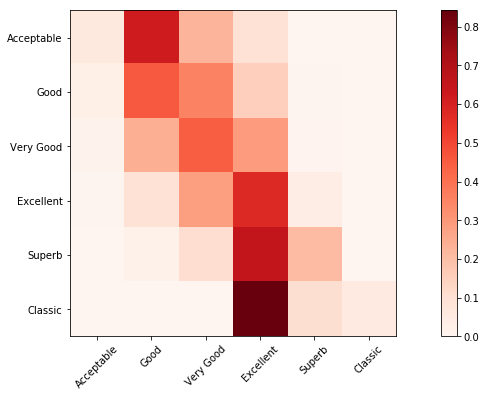

In [43]:
cm1 = confusion_matrix(y_test,clf.predict(X_test))
cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(16,6))
plt.imshow(cm1, interpolation='nearest', cmap=plt.cm.Reds)
class_name = ["Acceptable", "Good", "Very Good", "Excellent", "Superb", "Classic"]
plt.colorbar()
tick_marks = np.arange(len(class_name))
plt.xticks(tick_marks, class_name, rotation=45)
plt.yticks(tick_marks, class_name)
plt.show()

***Confusion Matrix of RandomForest***

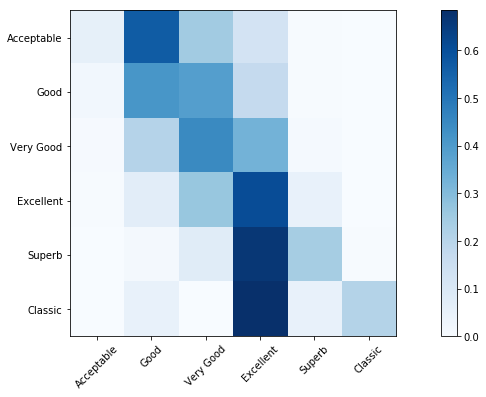

In [44]:
cm2 = confusion_matrix(y_test,rfc_b.predict(X_test))
cm2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(16,6))
plt.imshow(cm2, interpolation='nearest', cmap=plt.cm.Blues)
class_name = ["Acceptable", "Good", "Very Good", "Excellent", "Superb", "Classic"]
plt.colorbar()
tick_marks = np.arange(len(class_name))
plt.xticks(tick_marks, class_name, rotation=45)
plt.yticks(tick_marks, class_name)
plt.show()

***Confusion Matrix of LogisticRegression***

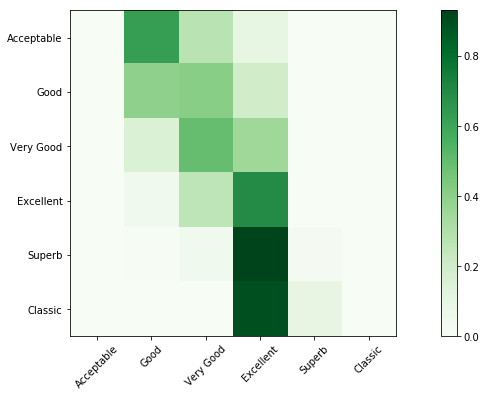

In [45]:
cm3 = confusion_matrix(y_test,logreg.predict(X_test))
cm3 = cm3.astype('float') / cm3.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(16,6))
plt.imshow(cm3, interpolation='nearest', cmap=plt.cm.Greens)
class_name = ["Acceptable", "Good", "Very Good", "Excellent", "Superb", "Classic"]
plt.colorbar()
tick_marks = np.arange(len(class_name))
plt.xticks(tick_marks, class_name, rotation=45)
plt.yticks(tick_marks, class_name)
plt.show()

**4.1.3 Classification Report (f1_score, recall_score)**

***Classification Report of DecisionTree***

In [46]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.09      0.06      0.07       570
         2.0       0.43      0.46      0.45      5510
         3.0       0.44      0.45      0.45      8621
         4.0       0.55      0.58      0.56      9033
         5.0       0.39      0.21      0.27      1353
         6.0       0.10      0.05      0.07        19

    accuracy                           0.47     25106
   macro avg       0.33      0.30      0.31     25106
weighted avg       0.47      0.47      0.47     25106



***Classification Report of RandomForest***

In [47]:
print(classification_report(y_test,rfc_b.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.13      0.06      0.08       570
         2.0       0.45      0.41      0.43      5510
         3.0       0.45      0.45      0.45      8621
         4.0       0.54      0.61      0.57      9033
         5.0       0.37      0.24      0.29      1353
         6.0       0.25      0.21      0.23        19

    accuracy                           0.48     25106
   macro avg       0.36      0.33      0.34     25106
weighted avg       0.47      0.48      0.47     25106



***Classification Report of LogisticRegression***

In [48]:
print(classification_report(y_test,logreg.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       570
         2.0       0.51      0.39      0.45      5510
         3.0       0.47      0.50      0.48      8621
         4.0       0.54      0.70      0.61      9033
         5.0       0.61      0.02      0.04      1353
         6.0       0.00      0.00      0.00        19

    accuracy                           0.51     25106
   macro avg       0.36      0.27      0.26     25106
weighted avg       0.50      0.51      0.48     25106



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 4.2 Performance Comparison 


Based on the results above, we can see there are slight difference between three different algorithms. However, the LogisticRegression performed better in all three different evaluation criteria. 

### **4.3 Efficiency Analysis**

As shown in modelling section, TecisionTree time cost is "CPU times: user 1.65 s, sys: 1.45 ms, total: 1.65 s Wall time: 1.65 s".

RandomForest shows "CPU times: user 3.08 s, sys: 1.53 ms, total: 3.08 s Wall time: 3.08 s".

LogisticRegression shows "CPU times: user 2.07 s, sys: 55.1 ms, total: 2.13 s Wall time: 1.98 s".

Therefore, DecisionTree performed the highest efficiency. 

### 4.4 Comparative Study

**Natural Language Processing (NLP)**

One reason that I chose this dataset is that it contains human reviews, which can be a practice of NLP. After guest lecture, I reviewed some papers about NLP. As I see, NLP is basically a text pre-processing and it converts text into vector format, which is easier for modelling. Normally, NLP includes couple steps, tokenization, stopwords, stemming and vectorization.

In [0]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
import nltk

***Pre-process text***

In [0]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
description = df['description'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(description)
y = df['rank']

***Training model***

In [0]:
# Training model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.7)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Testing model
predictions = rfc.predict(X_test)

In [58]:
print('NLP test accuracy score:', accuracy_score(y_test,predictions))

NLP test accuracy score: 0.5307894527204652


In [59]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.50      0.11      0.18       570
         2.0       0.52      0.53      0.52      5510
         3.0       0.48      0.50      0.49      8621
         4.0       0.58      0.67      0.62      9033
         5.0       0.43      0.02      0.04      1353
         6.0       0.00      0.00      0.00        19

    accuracy                           0.53     25106
   macro avg       0.42      0.30      0.31     25106
weighted avg       0.52      0.53      0.51     25106



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


With a simple pre-process and vectorization, text feature "description" performed a higher accuracy than three algorithms I tried previously. However, this "baby version" NLP is poorly desighed due to time limit.

## 5. Conclusion

### 5.1 Reflections

Based on previous work in this project, I found that the predictive model is actually work on this wine dataset. All of three algorithms applied in this model performed well and could give a relatively acceptable accuracy based on input columns. However, since I am still a beginner in machine learning world, there is a lot of improvement I could make to polish my predictive model. Last but not least, it is a pity that I did not spend more time on NLP for feature "description".

### 5.2 Future Improvements

A lot of improvement are needed for this project. I think of few points after I finished previous work, shown as below.

1.	Normalization of price 

Normalization of feature "price" can be tried next time, it might help to increase correlation with rank.

2.	Imbalanced target output

I mentioned this challenge when I set up the output feature "rank". However, I feel like more work should have been done to further solve this issue. For instance, over-sampling minority class might help with classification and prediction. 

3.	Other algorithms 

Some other algorithms like K-Nearest Neighbors and XGBoost should have been applied to percome a comparative study. 

4.	Tune parameters 

I did not spend a lot of time on tuning parameters when applying algorithms. I will spend more time on this in future work to find the optimal parameters. 

5.	NPL 

Like I mentioned above, I feel it is a shame that I could not show a more ideal NPL work in this project. However, it is a really good dataset for me to practice. 


## 6. Ethical Discussion 

The successful adoption of the developed classification solutions requires certain ethical behaviours of participating wine producers. They are supposed to provide genuine and precise description of their products. Failure to do so may impair the accuracy of recommendations. 

One can easily think of possible scenarios where such technique is misused by participating stakeholders. A certain producer, for example, intentionally alters the description of their product so that it resembles the description of a high-quality wine of a different brand. The altered description is no longer a genuine nor precise, but merely a means of achieving a high rating by copying a high-quality wine. When analysed using a utilitarian approach, such behaviour will benefit the dishonest producer temporarily by attracting more consumers, at the cost of impairing the benefits of consumers and other producers. This behaviour is probably also detrimental for the culprit producer in the long term. The deceived consumers will eventually learn the real quality of the wine after they have tasted it.

Winemakers can also take advantage of this technique by meeting only the few standards that would qualify them as good wine. For example, if wine produced at a certain region with a specific type of  grape is largely rated as high scores, winemakers may choose to base their factories in the same region with the same varietal of grapes. This way their products can be given a high score, regardless of their actual wine making techniques. Similarly, from a utilitarian perspective, such behaviours only benefit the cunning wine producer by giving them a ‘fake’ high score. The benefits of other producers and consumers will be compromised.


## 7. Reference

[1] Research, Z.M. 2018, Global Wine Market Will Reach USD 423.59 Billion by 2023: Zion Market Research, globenewswire, 2019, <https://www.globenewswire.com/news-release/2018/04/09/1467083/0/en/Global-Wine-Market-Will-Reach-USD-423-59-Billion-by-2023-Zion-Market-Research.html>.

[2] Statistics, A.B.o. 2019, 4307.0.55.001 - Apparent Consumption of Alcohol, Australia, 2017-18, Australian Bureau of Statistics, 2019, <https://www.abs.gov.au/ausstats/abs@.nsf/mf/4307.0.55.001>.

[3] Alcoholism, N.I.o.A.A.a., Drinking Levels Defined, National Institute on Alcohol Abuse and Alcoholism, 2019, <https://www.niaaa.nih.gov/alcohol-health/overview-alcohol-consumption/moderate-binge-drinking>.

[4] Er, Y. & Atasoy, A. 2016, 'The classification of white wine and red wine according to their physicochemical qualities', International Journal of Intelligent Systems and Applications in Engineering, pp. 23-6.

[5] Chen, B., Rhodes, C., Crawford, A. & Hambuchen, L. 2014, 'Wineinformatics: applying data mining on wine sensory reviews processed by the computational wine wheel', 2014 IEEE International Conference on Data Mining Workshop, IEEE, pp. 142-9.







